In [12]:
#dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import gmaps
import statsmodels.api as sm


In [13]:
#read csv and create DF
HOR_CSV = pd.read_csv("Homeownership_ACS.clean")
HOR_df = pd.DataFrame(HOR_CSV)

Income_Data = pd.read_csv("income_data_clean")
Income_df = pd.DataFrame(Income_Data)
Income_df.head()


,Unnamed: 0,county,2015
0,0,"Autauga, AL",38591
1,1,"Baldwin, AL",41412
2,2,"Barbour, AL",31509
3,3,"Bibb, AL",29048
4,4,"Blount, AL",31987


In [14]:
# declare column names in df
HOR_df = HOR_df[["County", "HOR"]]
Income_df = Income_df[["county","2015"]]
#change column name
HOR_df  = HOR_df.rename(columns={"County": "county"})
#print head
HOR_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [15]:
#get sample of HOR DF
sample_home_ownership = HOR_df.sample(n=1000)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Cedar, MO",70.4
1,"Trimble, KY",76.8
2,"Morton, ND",72.5
3,"Liberty, FL",75.3
4,"New York, NY",24.1


In [16]:
#SAMPLE OF INCOME DF
Income_Analysis = sample_home_ownership.merge(Income_df, on="county")
Income_Analysis.head()

,county,HOR,2015
0,"Cedar, MO",70.4,29764
1,"Morton, ND",72.5,51571
2,"Liberty, FL",75.3,22069
3,"Cabarrus, NC",70.8,41201
4,"McDonald, MO",70.7,26854


In [17]:
#AMOUNT OF VALUES FOUND
len(Income_Analysis)

728

## ANALYSIS


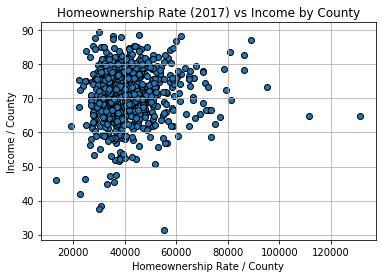

In [18]:
plt.scatter(Income_Analysis["2015"], Income_Analysis["HOR"], marker="o", edgecolor='black')
plt.title("Homeownership Rate (2017) vs Income by County")
plt.xlabel("Homeownership Rate / County")
plt.ylabel("Income / County")
plt.grid(True)
plt.savefig('Pictures/Post_sec_scatter.png')

In [19]:
x = Income_Analysis["2015"]
y = Income_Analysis["HOR"]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HOR   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.545
Date:                Mon, 09 Sep 2019   Prob (F-statistic):              0.111
Time:                        20:06:20   Log-Likelihood:                -2523.3
No. Observations:                 728   AIC:                             5051.
Df Residuals:                     726   BIC:                             5060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.9471      1.065     65.677      0.000      67.856      72.038
2015         3.97e-05   2.49e-05      1.595      0.111   -9.15e-06    8.86e-05
==============================================================================
Omnibus:                      114.696   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.905
Skew:                          -0.904   Prob(JB):                     7.24e-51
Kurtosis:                       5.084   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Set line
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

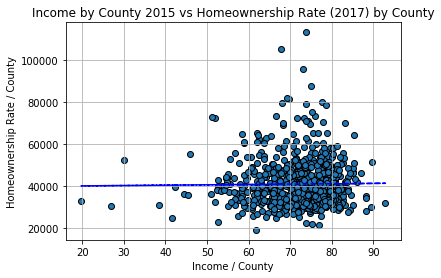

In [67]:
plt.scatter(Income_Analysis["HOR"], Income_Analysis["2015"], marker="o", edgecolor='black')
plt.title("Income by County 2015 vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate / County")
plt.xlabel("Income / County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Post_sec_regression.png')